In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('CaseCompetitionData.csv', sep=',')
data['actual'] = 1
data.loc[data['subsequent_purchases'] == 0, 'actual'] = 0
data['customer_age'] = data['customer_age'].map({'21 - 30':25, '61 - 70':65, '31 - 40':35, '41 - 50':45, '51 - 60':55, '101+':102, '71 - 80':75,
 '0 - 20':10, '81 - 90':85, '?':'?', '91 - 100':95})
data['customer_income'] = data['customer_income'].map({'20001 - 40000':30000, '80001 - 100000':90000, '40001 - 60000':50000, '60001 - 80000':70000,
 '120001 - 140000':130000, '0 - 20000':10000, '100001 - 120000':110000, '160001 - 180000':170000,
 '200001+':220000, '140001 - 160000':150000, '180001 - 200000':190000, '?':'?'})
data['purchase_price'] = data['purchase_price'].map({'10001 - 15000':12500, '15001 - 20000':17500, 
 '20001 - 25000':22500, '25001 - 30000':27500, '30001 - 35000':32500, '0 - 5000':2500, '45001 - 50000':47500, 
 '35001 - 40000':27500, '5001 - 10000':7500, '40001 - 45000':42500, '55001 - 60000':57500, '50001 - 55000':52500, 
 '60001 - 65000':62500, '65001 - 70000':67500, '70001 - 75000':72500, '75001 - 80000':77500, '85001 - 90000':87500,
 '90001 - 95000':92500, '80001 - 85000':82500, '?':'?'})
data['counter'] = 1
price = data.loc[data['purchase_price'] != '?']
income = data.loc[data['customer_income'] != '?']
distance = data.loc[data['customer_distance_to_dealer'] != '?']
age = data.loc[data['customer_age'] != '?']
print(len(price))
print(len(income))
print(len(distance))
print(len(age))
distance['customer_distance_to_dealer'] = distance['customer_distance_to_dealer'].astype(np.int64)

361556
312468
355397
360405


C:\Users\999Na\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
### Quantifying subs ratio for binary features

trade_in = data.groupby('trade_in')['actual'].mean().to_frame().reset_index()
print(trade_in.head())
customer_previous_purchase = data.groupby('customer_previous_purchase')['actual'].mean().to_frame().reset_index()
print(customer_previous_purchase.head())
warranty_used = data.groupby('vehicle_warranty_used')['actual'].mean().to_frame().reset_index()
print(warranty_used.head())
financing = data.groupby('vehicle_financing')['actual'].mean().to_frame().reset_index()
print(financing.head())
trade_in.to_csv('trade_subs.csv')
customer_previous_purchase.to_csv('prev_subs.csv')
warranty_used.to_csv('war_subs.csv')
financing.to_csv('fin_subs.csv')





   trade_in    actual
0         0  0.322550
1         1  0.363858
   customer_previous_purchase    actual
0                           0  0.329577
1                           1  0.387068
   vehicle_warranty_used    actual
0                      0  0.335684
1                      1  0.359969
   vehicle_financing    actual
0                  0  0.370446
1                  1  0.333032


In [4]:
### Trade_in subs split distribution

par_cats = data[['actual', 'trade_in']]
par_cats.dtypes
fig = px.parallel_categories(par_cats)
py.offline.plot(fig, filename='parallel_cats.html', auto_open=True)

'parallel_cats.html'

In [ ]:
purch_subs = data.groupby()

In [41]:
### Trade_in purchase year subs ratio

purchase_year = data.loc[data['purchase_vehicle_year'] >= 2000].groupby(['trade_in', 'purchase_vehicle_year'])['actual'].mean().to_frame().reset_index()
purchase_year
fig = px.bar(purchase_year, x='purchase_vehicle_year', y='actual', facet_row='trade_in')
py.offline.plot(fig, 'year_previous.html', auto_open=True)

#purchase_year.to_csv('purchase_year.csv')

'temp-plot.html'

In [39]:
### Trade in purchase year subs split distribution

par_cats = price.loc[price['purchase_vehicle_year'] >= 2000][['actual', 'purchase_vehicle_year', 'trade_in']]
par_cats.to_csv('trade_year_subs.csv')
#print(par_cats['purchase_vehicle_year'].unique())
#fig = px.parallel_categories(par_cats)
#py.offline.plot(fig, filename='parallel_cats.html', auto_open=True)

In [42]:
### Trade in income subs ratio

income_trade = income.groupby(['customer_income', 'trade_in'])['actual'].mean().to_frame().reset_index()
#purchase_year
#fig = px.bar(income_trade, x='customer_income', y='actual', facet_row='trade_in')
#py.offline.plot(fig, 'income_trade.html', auto_open=True)
income_trade.to_csv('income_trade_subs.csv')

In [43]:
### Trade in purchase price subs ratio

price_trade = price.groupby(['purchase_price', 'trade_in'])['actual'].mean().to_frame().reset_index()
#purchase_year
#fig = px.bar(price_trade, x='purchase_price', y='actual', facet_row='trade_in')
#py.offline.plot(fig, 'price_trade.html', auto_open=True)
#data['actual'].mean()
price_trade.to_csv('price_trade_subs.csv')

In [9]:
### trade in age subs ratio

age_trade = age.groupby(['customer_age', 'trade_in'])['actual'].mean().to_frame().reset_index()
purchase_year
fig = px.bar(age_trade, x='customer_age', y='actual', facet_row='trade_in')
py.offline.plot(fig, 'age_trade.html', auto_open=True)

'temp-plot.html'

In [63]:
### trade in distance to dealer subs ratio

dist_subs = distance.loc[distance['customer_distance_to_dealer'] <= 50].groupby(['customer_distance_to_dealer', 'customer_previous_purchase'])['actual'].mean().to_frame().reset_index()
purchase_year
fig = px.line(dist_subs, x='customer_distance_to_dealer', y='actual', facet_row='customer_previous_purchase')
py.offline.plot(fig, 'dist_trade.html', auto_open=True)
dist_subs.to_csv('dist_prev_subs_50.csv')

In [3]:
### trade in make subs ratio

make_trade = data.groupby(['purchase_make', 'trade_in'])['actual'].mean().to_frame().reset_index()

#fig = px.bar(make_trade, x='purchase_make', y='actual', facet_row='trade_in')
#py.offline.plot(fig, 'make_trade.html', auto_open=True)

make_subs = data.groupby('purchase_make')['actual'].mean().to_frame().reset_index()
fig = px.bar(make_subs, x='purchase_make', y='actual')
py.offline.plot(fig, 'make_subs.html', auto_open=True)

'temp-plot.html'

In [4]:
make_prev = data.groupby(['purchase_make', 'customer_previous_purchase'])['actual'].mean().to_frame().reset_index()
fig = px.bar(make_prev, x='purchase_make', y='actual', facet_row='customer_previous_purchase')
py.offline.plot(fig, 'make_prev.html', auto_open=True)

'temp-plot.html'

0.35903806022061013
0.5550632128474738


PermissionError: [Errno 13] Permission denied: 'low_make_subs.csv'

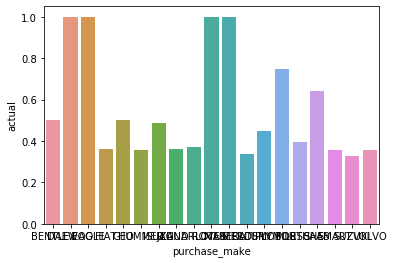

In [13]:
makes = data
makes['counter'] = 1
makes = makes.groupby('purchase_make')['counter'].sum().to_frame().reset_index()

low_demand = makes.loc[makes['counter'] < 2000]
print(data.loc[data.purchase_make.isin(low_demand['purchase_make'].unique())]['actual'].mean())
low_make = data.loc[data.purchase_make.isin(low_demand['purchase_make'].unique())].groupby('purchase_make')['actual'].mean().to_frame().reset_index()
sns.barplot(x='purchase_make', y='actual', data=low_make)
print(low_make['actual'].mean())
low_make.to_csv('low_make_subs.csv')
#makes
low_demand.to_csv('low_demand_dist.csv')
make_subs.groupby('purchase_make')['actual'].mean().to_frame().reset_index().to_csv('make_subs.csv')

In [14]:
make_fin = data.groupby(['purchase_make', 'vehicle_financing'])['actual'].mean().to_frame().reset_index()
#fig = px.bar(make_fin, x='purchase_make', y='actual', facet_row='vehicle_financing')
#py.offline.plot(fig, 'make_fin.html', auto_open=True)
make_fin.to_csv('make_fin_subs.csv')

In [38]:
### Purchase price subs ratio

purch_ratio = price.groupby('purchase_price')['actual'].mean().to_frame().reset_index()
purch_ratio.to_csv('purch_subs.csv')
#fig = px.bar(purch_ratio, x='purchase_price', y='actual')
#py.offline.plot(fig, 'price_subs.html', auto_open=True)

In [13]:
### purchase price subs=1 distribution 

purch = price.loc[data['actual'] == 1].groupby('purchase_price')['actual'].sum().to_frame().reset_index()
fig = px.bar(purch, x='purchase_price', y='actual')
py.offline.plot(fig, 'price_subs_1_dist.html', auto_open=True)
purch

,purchase_price,actual
0,2500,2944
1,7500,3764
2,12500,33753
3,17500,39607
4,22500,22396
5,27500,13560
6,32500,5199
7,47500,1716
8,52500,249
9,57500,158


In [18]:
### purchase price distribution

purch_dist = price.groupby('purchase_price')['insert_num'].count().to_frame().reset_index()
fig = px.bar(purch_dist, x='purchase_price', y='insert_num')
py.offline.plot(fig, 'price_dist.html', auto_open=True)

'temp-plot.html'

In [19]:
### purchase price warranty subs ratio

warranty_price = price.groupby(['vehicle_warranty_used', 'purchase_price'])['actual'].mean().to_frame().reset_index()
fig = px.bar(warranty_price, x='purchase_price', y='actual', facet_row='vehicle_warranty_used')
py.offline.plot(fig, 'warranty_price.html', auto_open=True)

'temp-plot.html'

In [20]:
### purchase price year subs ratio

price_year = price.loc[price['purchase_vehicle_year'] > 2000].groupby(['purchase_vehicle_year', 'purchase_price'])['actual'].mean().to_frame().reset_index()
fig = px.bar(price_year, x='purchase_price', y='actual', facet_row='purchase_vehicle_year', width=1600, height=1600)
py.offline.plot(fig, 'price_year.html', auto_open=True)

'temp-plot.html'

In [21]:
### purchase price subs split distribution

par_cats = price[['actual', 'purchase_price']]
par_cats.dtypes
fig = px.parallel_categories(par_cats)
py.offline.plot(fig, filename='parallel_cats.html', auto_open=True)

'parallel_cats.html'

In [28]:
### purchase price income subs ratio

price_income = price.merge(income['insert_num'], on='insert_num')
price_income = price_income.groupby(['purchase_price', 'customer_income'])['actual'].mean().to_frame().reset_index()
fig = px.bar(price_income, x='purchase_price', y='actual', facet_row='customer_income', width=1600, height=1600)
py.offline.plot(fig, 'price_income.html', auto_open=True)

'temp-plot.html'

In [29]:
### purchase price income distribution

price_income = price.merge(income['insert_num'], on='insert_num')
price_income = price_income.groupby(['purchase_price', 'customer_income'])['actual'].count().to_frame().reset_index()
fig = px.bar(price_income, x='purchase_price', y='actual', facet_row='customer_income', width=1600, height=1600)
py.offline.plot(fig, 'price_income.html', auto_open=True)

'temp-plot.html'